<a href="https://colab.research.google.com/github/TharaThankachan/Assignment_1_Sep/blob/main/Big_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
pip install -U klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 8.6 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [37]:
import klib

In [81]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
train=pd.read_csv('/content/train_v9rqX0R.csv')
test=pd.read_csv('/content/test_AbJTz2l.csv')

In [12]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
train.shape

(8523, 12)

In [11]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [9]:
test.shape

(5681, 11)

In [10]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
#check for null values

In [15]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


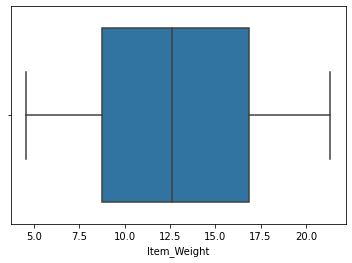

In [17]:
sns.boxplot(train['Item_Weight'])
plt.show()

In [ ]:
# there is no outliers in Item_Weight and it is a numeric column, so fill the null value with mean

In [48]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [49]:
# the same way we can fill Item_Weight in test
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
#now we have to fill Outlet_Size  ,this column contains text values so fill the column with mode   

In [50]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [51]:
# the same way we can fill Item_Weight in test
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [52]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [53]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
#Selecting features,here we can avoid unnecessary features

In [54]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [55]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
#Exploratory Data Analysis using HEATMAP

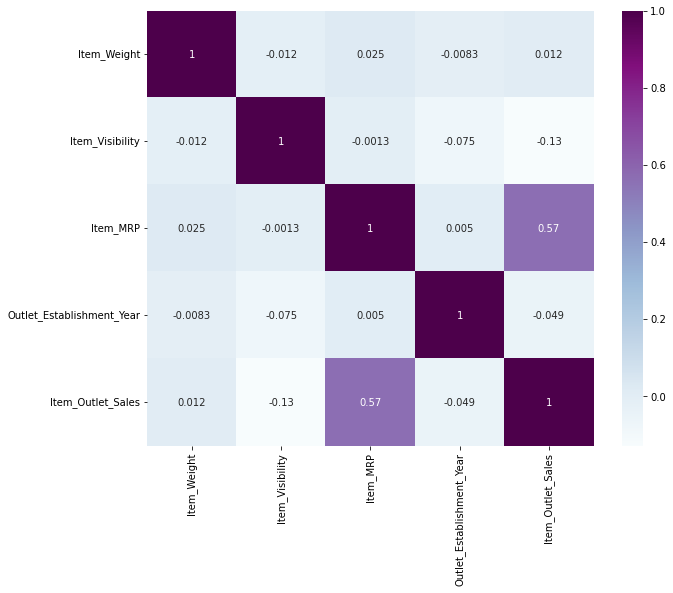

In [56]:
cm=train.corr
plt.subplots(figsize=(10,8))
sns.heatmap(cm(),annot=True,cmap='BuPu')

In [57]:
train.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [58]:
#EDA using klib

GridSpec(6, 5)

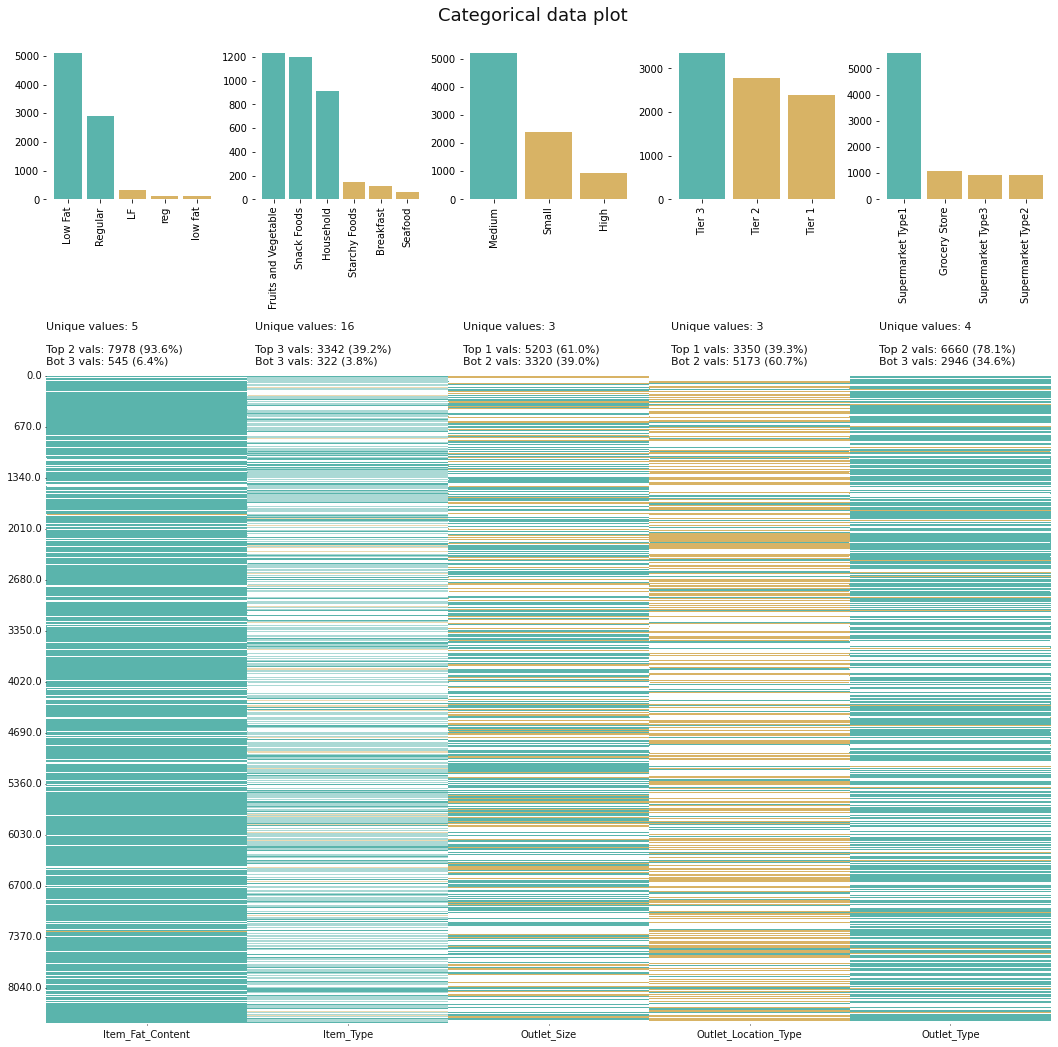

In [59]:
klib.cat_plot(train)

In [60]:
klib.corr_mat(train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


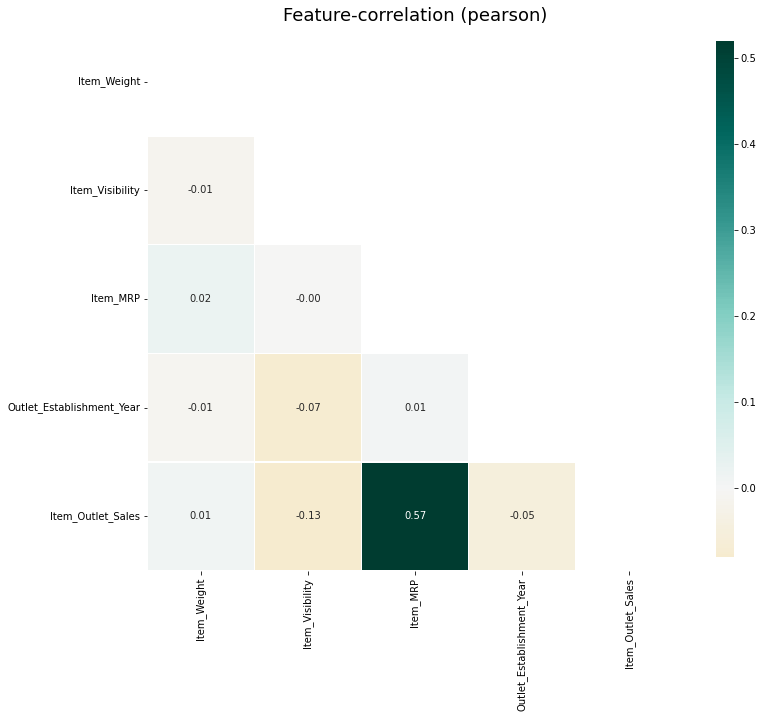

In [61]:
klib.corr_plot(train)

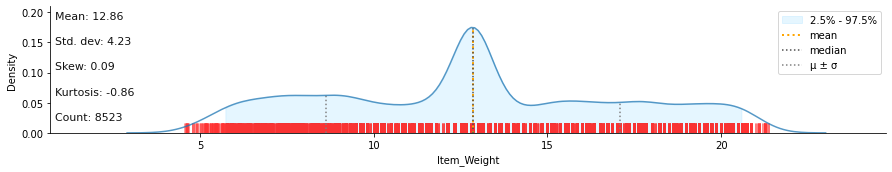

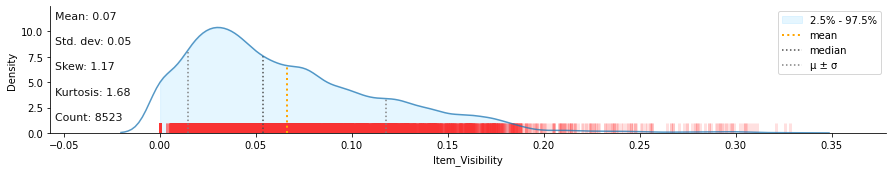

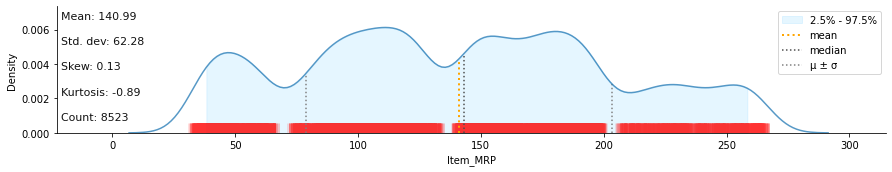

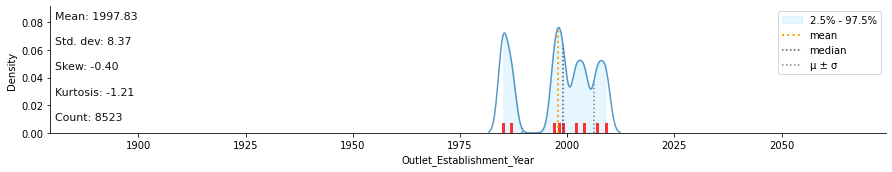

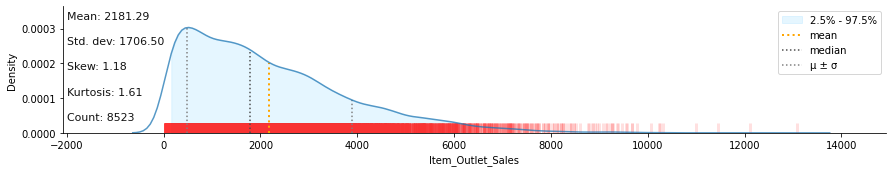

In [62]:
klib.dist_plot(train)

In [63]:
klib.missingval_plot(train)

No missing values found in the dataset.


In [ ]:
#data cleaning

In [64]:
klib.data_cleaning(train)

Shape of cleaned data: (8523, 10)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.43 MB (-66.15%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.3,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.92,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.5,Low Fat,0.01676,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.27002
3,19.200001,Regular,0.0,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.93,Low Fat,0.0,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.38,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.6,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.21,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [65]:
klib.clean_column_names(train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [75]:
train=klib.convert_datatypes(train)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   Float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   Float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   Float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   Float32 
dtypes: Float32(4), category(5), int16(1)
memory usage: 226.2 KB


In [73]:
#preprocessing categorical values
#Label Encoding

In [82]:
le=LabelEncoder()

In [ ]:
#train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

train['Item_Type'] = le.fit_transform(train['Item_Type'])

train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])


In [83]:
train=train.apply(le.fit_transform)

In [84]:
train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,284,1,664,4,5592,4,1,0,1,2540
1,57,2,880,14,473,8,1,2,2,422
2,376,1,715,10,2901,4,1,0,1,1639
3,393,2,0,6,4227,3,1,2,0,670
4,265,1,0,9,627,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...
8518,125,1,3912,13,4955,1,0,2,1,2047
8519,233,2,3278,0,2023,5,1,1,1,516
8520,299,1,2302,8,1263,6,2,1,1,1018
8521,149,2,7174,13,1857,8,1,2,2,1466


In [ ]:
# Selecting target and features

In [89]:
Y=train['item_outlet_sales']
X=train.drop('item_outlet_sales',axis=1)

In [ ]:
# splitting the data into test and train

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=101,test_size=0.2)

In [94]:
Y_train

3684     144
1935    1311
5142    1242
4978    1426
2299    2462
        ... 
599     3137
5695    1193
8006    1684
1361    2001
1547     746
Name: item_outlet_sales, Length: 6818, dtype: int64

In [ ]:
#Standardization

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [96]:
std_X_train=sc.fit_transform(X_train)

In [100]:
std_X_train=pd.DataFrame(std_X_train)

In [101]:
std_X_train.describe

<bound method NDFrame.describe of              0         1         2         3         4         5         6  \
0     1.004390 -0.573827  0.965214 -0.758474 -1.369465 -1.013080 -1.956995   
1    -1.237602 -0.573827  0.192036  1.607592 -0.822300  1.182929 -0.288729   
2     1.014966  0.973780  0.291761  0.661166  0.476099  1.182929 -0.288729   
3    -2.252844 -2.121434 -0.709239 -0.758474  0.670023 -0.647078  1.379537   
4     0.729429 -0.573827 -1.071001 -0.758474 -0.488153  0.450926 -0.288729   
...        ...       ...       ...       ...       ...       ...       ...   
6813 -3.056577 -0.573827 -0.279464  1.607592  0.902136 -0.647078  1.379537   
6814  0.475618 -0.573827  1.591517 -0.048654 -1.333664  0.450926 -0.288729   
6815  0.232383 -0.573827 -1.198682  0.187953 -0.781725 -0.647078  1.379537   
6816 -0.095455  0.973780  1.299854 -1.704900  1.328769  1.182929 -0.288729   
6817  0.623675 -0.573827  1.539777  0.424559 -1.313376  1.548930 -0.288729   

             7         8  
0 

In [ ]:
#Modeling

In [ ]:
#Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(X_train,Y_train)
lr_Y_predict=model1.predict(X_test)

In [140]:
LinearRegression()

LinearRegression()

In [111]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [114]:
print(r2_score(lr_Y_predict,Y_test))

0.1674825701983349


In [115]:
print(mean_squared_error(lr_Y_predict,Y_test))

376634.3413252003


In [116]:
print(mean_absolute_error(lr_Y_predict,Y_test))

489.2486877014629


In [117]:
#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [118]:

l=Lasso(alpha=1.0)
l.fit(X_train,Y_train)
P=l.predict(X_test)



In [141]:
Lasso()

Lasso()

In [119]:
print("slope:",l.coef_[0])

slope: -0.11128513750757626


In [120]:
print('Mean Squared Error',mean_squared_error(Y_test,P))

Mean Squared Error 376714.10299923306


In [121]:
print('R Squared Value',r2_score(Y_test,P))

R Squared Value 0.5450950262848981


In [132]:
#Random Forest regressor

In [137]:

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [143]:
rf=rf.fit(X_train,Y_train)
y_predict=rf.predict(X_test)

In [144]:
RandomForestRegressor()

RandomForestRegressor()

In [130]:
mean_squared_error(y_predict,Y_test)

324167.84741665685

In [131]:
mean_absolute_error(y_predict,Y_test)

432.3652199413489

In [132]:
r2_score(y_predict,Y_test)

0.43209429472708316

In [ ]:
# Here lasso regression got the better accuracy

In [ ]:
from sys import set_coroutine_origin_tracking_depth
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lasso,prepared_data,data_labels,scoring) 

In [133]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from seaborn.relational import bootstrap
param_grid=['n_estimators':[{3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3]}

In [145]:
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

las = Lasso()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


NameError: ignored